In [1]:
import numpy as np
from scipy.linalg import norm

In [2]:
np.random.seed(0)

In [3]:
S = np.ones((5, 5))
S

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [4]:
x = np.random.normal(0, 1, size=(5, 1))
x

array([[1.76405235],
       [0.40015721],
       [0.97873798],
       [2.2408932 ],
       [1.86755799]])

In [5]:
norm(x - S @ x) ** 2

np.float64(170.4876602173265)

In [6]:
np.trace(S @ S @ x @ x.T) - 2 * np.trace(S @ x @ x.T) + np.trace(x @ x.T)

np.float64(170.48766021732655)

In [7]:
S @ x @ x.T - x @ x.T

array([[ 9.67996626,  2.19580121,  5.37067434, 12.29655719, 10.24793758],
       [12.08594868,  2.74157368,  6.70557031, 15.35290053, 12.79509084],
       [11.0653019 ,  2.51005041,  6.13929133, 14.0563628 , 11.71455769],
       [ 8.83879403,  2.0049899 ,  4.90397208, 11.22800776,  9.35740963],
       [ 9.49737688,  2.15438268,  5.26936943, 12.06461209, 10.05463479]])

In [8]:
from utils import duplication_matrix_hh, elimination_matrix_hh
D_h = duplication_matrix_hh(5).tocsc()
D_h_T = D_h.T
E_h = elimination_matrix_hh(5).tocsc()
E_h_T = E_h.T

Loaded cached matrix from matrix_cache/duplication_matrix_hh_N=5.npz
Loaded cached matrix from matrix_cache/elimination_matrix_hh_N=5.npz


In [9]:
Sigma_kron_I = np.kron(x @ x.T, np.eye(5))
Q_t = D_h_T @ Sigma_kron_I @ D_h
D_h @ (Q_t @ E_h @ S.flatten() - 2 * E_h @ (x @ x.T).flatten())

array([ 0.        , 12.86995336, 12.98288616, 13.22924541, 13.15637436,
       12.86995336,  0.        ,  8.43232261, 15.5644713 , 13.45483994,
       12.98288616,  8.43232261,  0.        , 14.5738403 , 13.32822724,
       13.22924541, 15.5644713 , 14.5738403 ,  0.        , 13.05202573,
       13.15637436, 13.45483994, 13.32822724, 13.05202573,  0.        ])

In [10]:
a = np.ones([5, 5])
a

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [11]:

norm(a)

np.float64(5.0)

/var/folders/tm/yyxy6gf12051s2gj98q37b3w0000gn/T/ipykernel_46550/3277599160.py:10: RuntimeWarning: invalid value encountered in divide
  return sigma**2 * (N - (mean / sigma)**2)


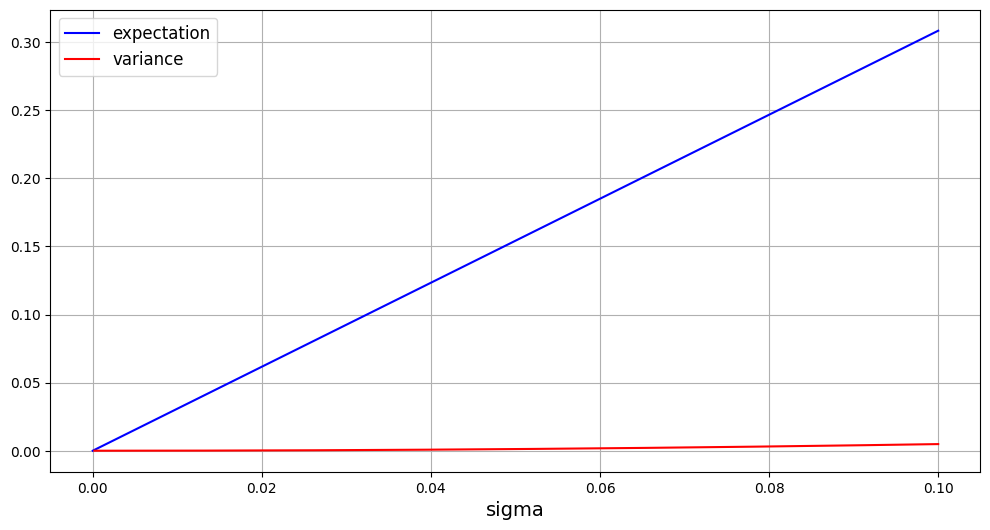

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

def calculate_expectation(N, sigma):
    return sigma * np.sqrt(2) * gamma((N + 1) / 2) / gamma(N / 2)

def calculate_variance(N, sigma):
    mean = calculate_expectation(N, sigma)
    return sigma**2 * (N - (mean / sigma)**2)

def plot_expectation_variance(N):
    sigma_values = np.linspace(0, 0.1, 500)
    expectations = calculate_expectation(N, sigma_values)
    variances = calculate_variance(N, sigma_values)

    plt.figure(figsize=(12, 6))
    plt.plot(sigma_values, expectations, label='expectation', color='blue')
    plt.plot(sigma_values, variances, label='variance', color='red')
    plt.xlabel('sigma', fontsize=14)
    # plt.ylabel('値', fontsize=14)
    # plt.title(f'次元数 N={N} におけるノルムの期待値と分散', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# 例として次元数 N=5 の場合
plot_expectation_variance(10)


In [13]:

X = np.random.rand(5, 6)

for x in X:
    print(x)

[0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492]
[0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985]
[0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918]
[0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194]
[0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355 ]


In [14]:
X.shape[1]

6

In [15]:
import cvxpy as cp
import numpy as np
from scipy.linalg import norm


def solve_offline_rho(x):
    N = x.shape[0]
    S = cp.Variable((N, N), symmetric=True)
    
    objective = cp.Minimize(cp.norm(x - S@x, 'fro'))
    
    constraints = [cp.diag(S) == 0]
    
    prob = cp.Problem(objective, constraints)
    
    prob.solve(solver=cp.SCS, verbose=False)
    
    if prob.status not in ["optimal", "optimal_inaccurate"]:
        raise ValueError("CVXPY did not find an optimal solution.")
    
    print(S.value)
    # print('norm(x - S.value @ x) ** 2 / 2')
    # print(norm(x - S.value @ x) ** 2 / 2)
    
    return norm(x - S.value @ x) ** 2 / 2

In [16]:
x = np.random.rand(5, 1)
solve_offline_rho(x)

[[1.13418204e-21 1.34697102e-01 4.23736864e-01 1.58995679e-01
  5.75485783e-02]
 [1.34697102e-01 1.18046452e-21 4.27470569e-01 1.61385396e-01
  5.84858086e-02]
 [4.23736864e-01 4.27470569e-01 1.84441028e-20 4.84893079e-01
  2.50479852e-01]
 [1.58995679e-01 1.61385396e-01 4.84893079e-01 2.12766189e-21
  7.59890825e-02]
 [5.75485783e-02 5.84858086e-02 2.50479852e-01 7.59890825e-02
  8.87844650e-23]]


np.float64(1.1355282952107143e-30)

In [17]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])